In [262]:
import pandas as pd
import missingno as msno
import numpy as np
import math as m
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.ensemble import ExtraTreesClassifier

In [133]:
df=pd.read_csv('wineQualityReds.csv')
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [121]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [122]:
df.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [123]:
l = []
bandera = np.NAN
for column in df.columns:
    if df[column].dtype == np.int64:
        bandera = 'entero'
    elif df[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df[column] =df[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df[column].nunique())
    print('UNIQUE: ', df[column].unique())
    print('VALUE COUNTS ', df[column].value_counts())
    print('\n')

COLUMNA:  fixed.acidity
TIPO:  flotante
NUNIQUE:  12
UNIQUE:  [ 7 11  6  5  8  4 10  9 12 15 13 14]
VALUE COUNTS  7     504
8     316
6     254
9     191
10    138
11     72
5      55
12     43
13     14
15      7
4       3
14      2
Name: fixed.acidity, dtype: int64


COLUMNA:  volatile.acidity
TIPO:  flotante
NUNIQUE:  2
UNIQUE:  [0 1]
VALUE COUNTS  0    1575
1      24
Name: volatile.acidity, dtype: int64


COLUMNA:  citric.acid
TIPO:  flotante
NUNIQUE:  2
UNIQUE:  [0 1]
VALUE COUNTS  0    1598
1       1
Name: citric.acid, dtype: int64


COLUMNA:  residual.sugar
TIPO:  flotante
NUNIQUE:  15
UNIQUE:  [ 1  2  6  3  4 10  5  7 11 15  8  9  0 12 13]
VALUE COUNTS  2     895
1     462
3     104
4      51
5      33
6      22
8       9
7       9
13      4
15      3
11      2
0       2
12      1
10      1
9       1
Name: residual.sugar, dtype: int64


COLUMNA:  chlorides
TIPO:  flotante
NUNIQUE:  1
UNIQUE:  [0]
VALUE COUNTS  0    1599
Name: chlorides, dtype: int64


COLUMNA:  free.sulfur.diox

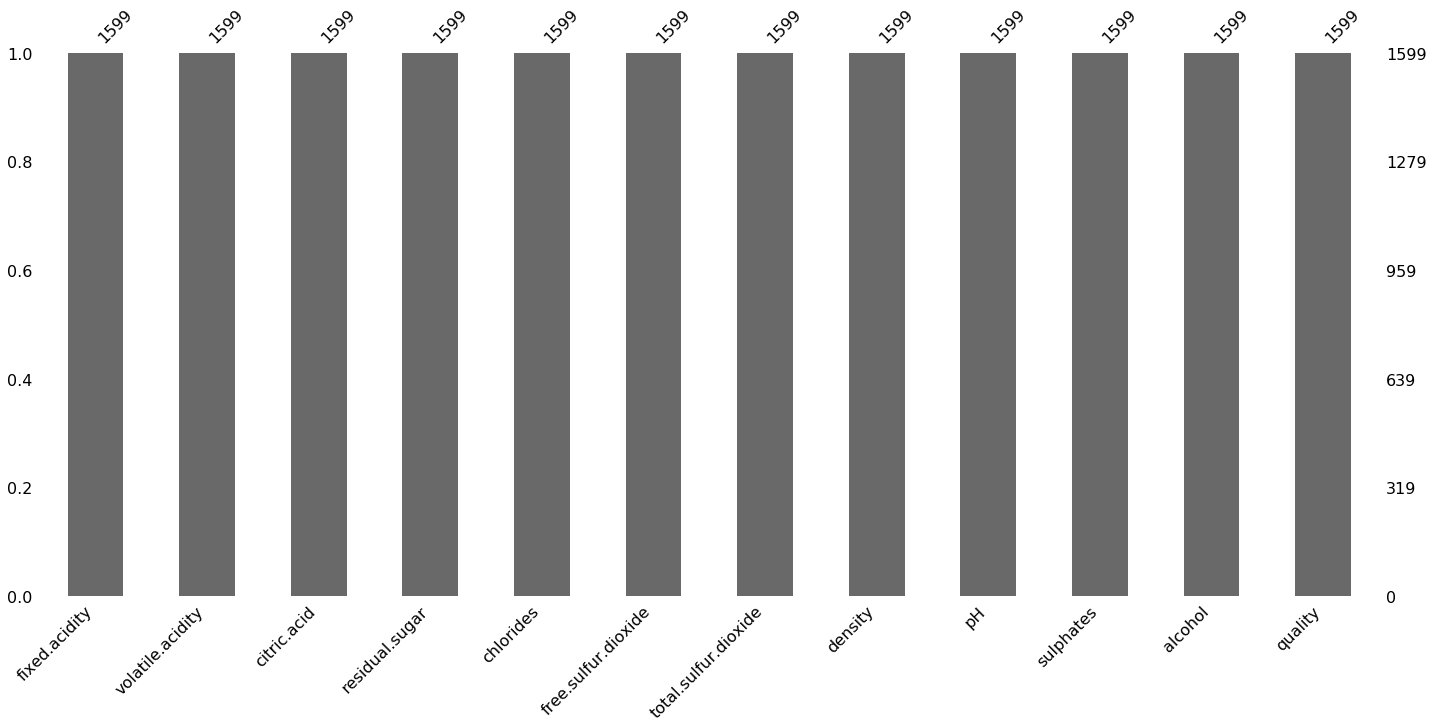

In [124]:
msno.bar(df_copy)

In [134]:
all_variables = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'] 
features = ['volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']

In [135]:
#Normalizamos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [136]:
#Componentes Principales
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_sc[features]),
                     columns=features)
df_pca.head()

,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,-0.291142,0.171990,-0.166568,0.033076,-0.027517,-0.091408,-0.041409,-0.009797,-0.018536,0.023465
1,-0.251650,0.242051,0.047723,0.026979,0.140458,0.128519,0.061834,-0.069521,-0.021733,-0.021300
2,-0.208911,0.163710,-0.071564,0.009940,0.082234,0.068192,0.042299,-0.019219,-0.041466,0.006652
3,0.342741,0.048451,0.015070,-0.107319,-0.133499,0.012861,-0.029734,-0.011565,-0.014732,0.021156
4,-0.291142,0.171990,-0.166568,0.033076,-0.027517,-0.091408,-0.041409,-0.009797,-0.018536,0.023465


In [137]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31191478, 0.21990967, 0.16587817, 0.07511566, 0.05888216,
       0.0551238 , 0.0403364 , 0.02993727, 0.02704141, 0.01586069])

In [138]:
df_pca['quality'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','quality']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,quality
0,-0.291142,0.171990,-0.166568,0.033076,-0.027517,-0.091408,-0.041409,-0.009797,-0.018536,0.023465,5
1,-0.251650,0.242051,0.047723,0.026979,0.140458,0.128519,0.061834,-0.069521,-0.021733,-0.021300,5
2,-0.208911,0.163710,-0.071564,0.009940,0.082234,0.068192,0.042299,-0.019219,-0.041466,0.006652,5
3,0.342741,0.048451,0.015070,-0.107319,-0.133499,0.012861,-0.029734,-0.011565,-0.014732,0.021156,6
4,-0.291142,0.171990,-0.166568,0.033076,-0.027517,-0.091408,-0.041409,-0.009797,-0.018536,0.023465,5


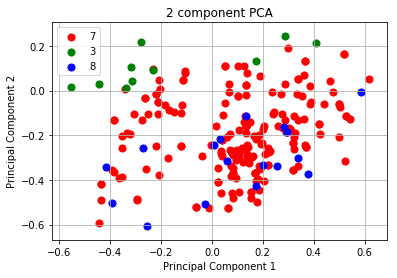

In [139]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [7, 3, 8]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['quality'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

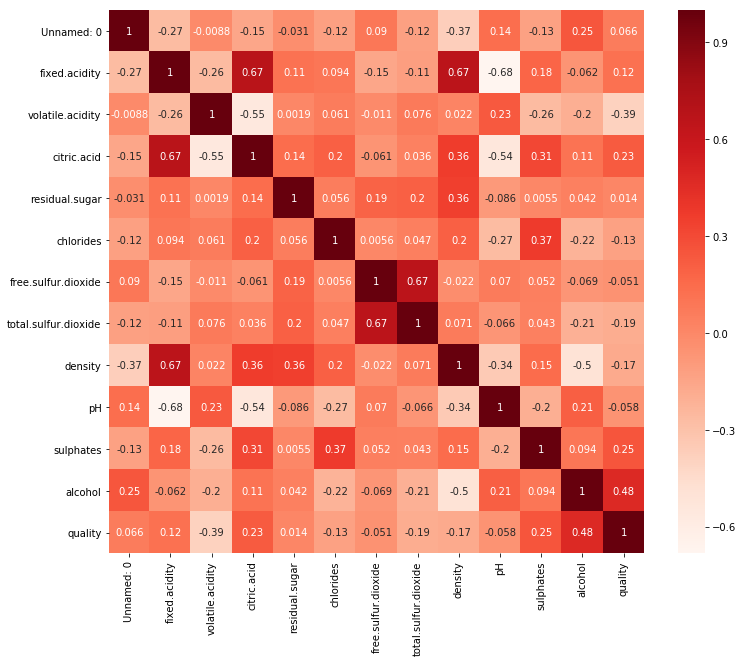

In [142]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [144]:
cor_target = abs(cor["quality"])

#Selección de características altamente correlacionadas
relevant_features = cor_target[cor_target>0.2]
relevant_features

volatile.acidity    0.390558
citric.acid         0.226373
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

In [290]:
X = df_pca.iloc[:, [1,2,3,4,5,6,7,8]].values
y = df_pca.iloc[:, 10].values
print(y)

[5 5 5 ... 6 5 6]


In [291]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [292]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [293]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [294]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [295]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.684375


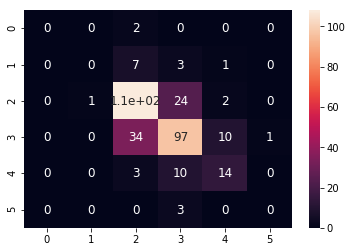

In [296]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix 
import seaborn as sn
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size

In [297]:
model = ExtraTreesClassifier()

In [298]:
model.fit(X_train,y_train)

/home/vagrant/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [299]:
print(model.feature_importances_)

[0.2044565  0.11327467 0.11147958 0.10841977 0.12751028 0.10996594
 0.11559078 0.10930249]


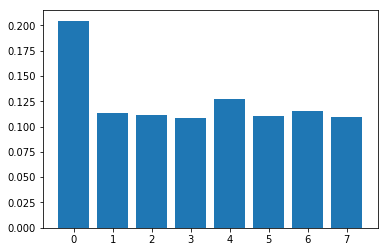

In [300]:
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

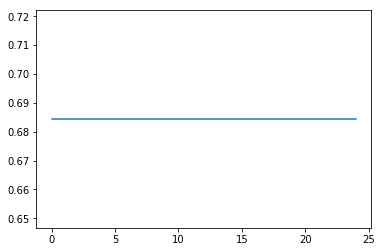

In [271]:
trees = range(25)
accuracy = np.zeros(25)

for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators = idx + 1)
    classifier = classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    accuracy[idx] = sklearn.metrics.accuracy_score(y_test, y_pred)

plt.cla()
plt.plot(trees, accuracy)